In [171]:
#Here you must specify your own path
root = ''

In [172]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [173]:
df = pd.read_csv(root + 'data/01_raw/answers.csv', sep=';', na_values = ['np.nan'],
                dtype = {'question_id': np.float64,
                        'questionnaire_id': np.float})

In [174]:
# Use only rows where the user_id is known
df = df[df['user_id'].notna()]

# Drop unknown question_ids
df = df[df['question_id'].notna()]

# Set dtype of question_id to int32
df = df.astype({'question_id': 'int32', 'user_id':'int32', 'questionnaire_id':'int32'})

# filter df to TSCHQ questionnaire with id=3
df = df[df.questionnaire_id == 3]

#copy df and filter to question_id with id = 5. Afterwards drop duplicates.
df1 = df.copy()
df1 = df1[df1.question_id == 5]
df1 = df1.drop_duplicates(['user_id','created_at','question_text'])
df1 = df1.pivot(columns='question_id', values='created_at', index = 'user_id')

#only years
df1 = df1[5].str[:4]
df1.columns = {"created at":"5:"}

In [175]:
df1

user_id
1       2015
39      2014
41      2014
64      2014
66      2014
        ... 
6403    2020
6404    2020
6411    2020
6412    2020
6413    2020
Name: 5, Length: 3174, dtype: object

Unroll data from answer column
Right now, there is only one column for all questions and one column containing all answers. Lets unroll these question_ids into multiple columns, using the user_id as an index.

In [176]:
df2 = df.set_index(['user_id', 'question_id', 'answer'], append = True)
df2 = df2.reset_index().pivot_table(values='answer', index='user_id', columns='question_id', aggfunc='first')
df2

question_id,4,5,6,7,8,9,10,11,12,13,...,76,77,78,79,80,81,82,83,84,85
user_id,,,,,,,,,,,,,,,,,,,,,
1,30.05.2015,Female,Both Sides,Yes,parents,30.05.2015,Abrupt,change in hearing,NaN,YES with heart beat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,01.06.1980,Female,Both Sides,No,siblings|parents,06.01.1980,Abrupt,whiplash,NaN,YES with heart beat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,16.04.1979,Male,Right,No,NaN,01.01.2001,Gradual,change in hearing,NaN,YES with heart beat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,16.11.1978,Male,Right,No,NaN,01.11.2013,Gradual,stress,NaN,NO,...,YES,Left,Sometimes,NO,NO,YES,NO,NO,NO,YES
66,14.02.1979,Male,Right,No,parents,14.02.2010,Gradual,loud blast of sound,NaN,"YES, different from heart beat",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6403,30.11.1971,Female,Right,No,NaN,14.01.2015,Abrupt,other,Hörsturz,NO,...,YES,None,Always,YES,YES,YES,NO,NO,NO,YES
6404,23.01.1984,Male,Both Sides,Yes,parents,01.01.1992,Gradual,loud blast of sound,NaN,YES with heart beat,...,NO,None,Always,YES,YES,NO,NO,NO,YES,NO
6411,11.06.1949,Female,Right,No,NaN,18.02.2008,Abrupt,loud blast of sound,NaN,NO,...,YES,Both,Sometimes,NO,NO,NO,NO,NO,NO,YES


In [177]:
# generate a dict with question_id and text
dic = dict(zip(df.question_id, df.question_text))
len(dic)
for key in sorted(dic.keys()):
    print(key, '\t', dic[key])

4 	 Date of Birth
5 	 Gender
6 	 Handedness
7 	 Family history of tinnitus complaints
8 	 if yes:
9 	 Initial onset: When did you first experience your tinnitus?
10 	 How did you perceive the beginning?
11 	 Was the initial onset of your tinnitus related to
12 	 If other:
13 	 Does your tinnitus seem to PULSATE ?
17 	 What percent of your total awake time, over the last month, have you been aware of your tinnitus? For example, 100% would indicate that you were aware of your tinnitus all the time, 25% would indicate that you were aware of your tinnitus 1/4 of the time.
35 	 Where do you perceive your tinnitus
36 	 How does your tinnitus manifest itself over time?
37 	 Does the LOUDNESS of the tinnitus vary from day to day?
38 	 Describe the LOUDNESS of your tinnitus
39 	 Please describe in your own words what your tinnitus usually sounds like
40 	 Does your tinnitus more sound like a tone or more like noise ?
65 	 Please describe the PITCH of your tinnitus.
66 	 What percent of your tot

In [178]:
#Columns
df.columns

Index(['id', 'questionnaire_id', 'question_id', 'user_id', 'question_text',
       'answer', 'questionnaire_id_reference', 'question_id_reference',
       'user_id_reference', 'created_at', 'updated_at', 'submited'],
      dtype='object')

`38`: Describe the LOUDNESS of your tinnitus
`36`: How does your tinnitus manifest itself over time?

In [179]:
# convert column 38 'Describe the LOUDNESS of your tinnitus' to float
df2.loc[:, 38] = df2.loc[:, 38].astype('float')

# group loudness into 5 categories
# [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]
loudness = pd.cut(df2.loc[:, 38], bins=[0, 20, 40, 60, 80, 100])

pd.crosstab(df2.loc[:, 36], loudness)

38,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
36,,,,,
constant,710,268,379,386,214
intermittent,248,152,141,98,32


In [180]:
#Mapping of Question_id to Questiontext
dic

{4: 'Date of Birth',
 5: 'Gender',
 6: 'Handedness',
 7: 'Family history of tinnitus complaints',
 9: 'Initial onset: When did you first experience your tinnitus?',
 10: 'How did you perceive the beginning?',
 11: 'Was the initial onset of your tinnitus related to',
 13: 'Does your tinnitus seem to PULSATE ?',
 35: 'Where do you perceive your tinnitus',
 36: 'How does your tinnitus manifest itself over time?',
 37: 'Does the LOUDNESS of the tinnitus vary from day to day?',
 38: 'Describe the LOUDNESS of your tinnitus',
 40: 'Does your tinnitus more sound like a tone or more like noise ?',
 39: 'Please describe in your own words what your tinnitus usually sounds like',
 12: 'If other:',
 8: 'if yes:',
 65: 'Please describe the PITCH of your tinnitus.',
 17: 'What percent of your total awake time, over the last month, have you been aware of your tinnitus? For example, 100% would indicate that you were aware of your tinnitus all the time, 25% would indicate that you were aware of your tin

In [181]:
df.head(100)

,id,questionnaire_id,question_id,user_id,question_text,answer,questionnaire_id_reference,question_id_reference,user_id_reference,created_at,updated_at,submited
0,158,3,4,64,Date of Birth,16.11.1978,3,4,64,2014-04-10 09:39:40,2014-04-10 09:39:40,1
1,159,3,5,64,Gender,Male,3,5,64,2014-04-10 09:39:40,2014-04-10 09:39:40,1
2,160,3,6,64,Handedness,Right,3,6,64,2014-04-10 09:39:40,2014-04-10 09:39:40,1
3,161,3,7,64,Family history of tinnitus complaints,No,3,7,64,2014-04-10 09:39:40,2014-04-10 09:39:40,1
4,162,3,9,64,Initial onset: When did you first experience y...,01.11.2013,3,9,64,2014-04-10 09:39:40,2014-04-10 09:39:40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
212,549,3,35,78,Where do you perceive your tinnitus,"both ears, worse in right",3,35,78,2014-04-26 05:14:52,2014-04-26 05:14:52,1
213,550,3,4,78,Date of Birth,26.04.2014,3,4,78,2014-04-26 05:14:52,2014-04-26 05:14:52,1
214,551,3,37,78,Does the LOUDNESS of the tinnitus vary from da...,Yes,3,37,78,2014-04-26 05:14:52,2014-04-26 05:14:52,1
215,552,3,8,78,if yes:,siblings,3,8,78,2014-04-26 05:14:52,2014-04-26 05:14:52,1


In [182]:
df2.head(50)

question_id,4,5,6,7,8,9,10,11,12,13,...,76,77,78,79,80,81,82,83,84,85
user_id,,,,,,,,,,,,,,,,,,,,,
1,30.05.2015,Female,Both Sides,Yes,parents,30.05.2015,Abrupt,change in hearing,NaN,YES with heart beat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,01.06.1980,Female,Both Sides,No,siblings|parents,06.01.1980,Abrupt,whiplash,NaN,YES with heart beat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,16.04.1979,Male,Right,No,NaN,01.01.2001,Gradual,change in hearing,NaN,YES with heart beat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,16.11.1978,Male,Right,No,NaN,01.11.2013,Gradual,stress,NaN,NO,...,YES,Left,Sometimes,NO,NO,YES,NO,NO,NO,YES
66,14.02.1979,Male,Right,No,parents,14.02.2010,Gradual,loud blast of sound,NaN,"YES, different from heart beat",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,24.04.2014,Female,Right,No,NaN,24.06.2010,Gradual,stress,NaN,"YES, different from heart beat",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,10.09.1985,Female,Right,Yes,Eltern|Eltern,07.09.1988,Gradual,loud blast of sound,NaN,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,06.04.1951,Female,Right,No,NaN,25.04.2009,Gradual,stress,NaN,NO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,13.10.1990,Male,Both Sides,No,NaN,28.12.2013,Gradual,stress,NaN,"YES, different from heart beat",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
df2.isna().sum()/len(df2)*100
#drop:
# drop 12 cause of individual answers related to 11
# drop 75 cause of too individual answers
# 39: drop cause of too individual answers
# 7: Fam History related to 8 needs to be binary cat(7 can be discarded because it was merged into 8)
df2.drop([12,75,39,7,75], axis = 1,inplace=True)

#hold
# 17: awake time aware needs to be converted 0-100% atm d
# 67: awake time beannoyed needs to be converted 0-100% atm d
# 66: equal to 17 d
# 38: part of target variable
# 4: date of birth needs to be converted to Age
# 5: gender needs to be converted binary cat
# 6: Handedness needs to converted
# 8: related to 7 Family member needs further research(combine features)
# 9: first time appearance needs to be converted to years.
#10: beginning perceive needs to be converted to binary cat
#11: several cat one hot related to 12
#13: Pulsate several cats need to be converted 
#35: Where tinnitus several cats
#36: part of target var
#37: variation loudness binary cat
#40: tinnitus sound several cats
#65 tinnitus pitch several cats
#68  tinnitus treatments several cats
#69  tinnitus reduced several cats
#70  tinnitus presence loud noise several cats
#71  tinnitus movement binary cats
#72  tinnitus nap several cats
#73  tinnitus relation sleep several cats
#74  tinnitus stress influence several cats
#76  hearing problem several cats
#77  hearing aid several cats
#78  tolerating sounds several cats
#79 sounds discomfort several cats
#80 headache binary cats
#81 vertigo dizziness binary cats
#82 disorder binary cats
#83 neck pain binary cats
#84 other pain binary cats
#85 psychatric binary cats

In [184]:
# missing values in columns (in %)
df2.isna().sum()/len(df2)*100

question_id
4      2.005013
5      0.563910
6      0.501253
8     72.556391
9      3.477444
10     0.845865
11     1.033835
13     0.783208
17    43.859649
35     0.908521
36     1.127820
37     1.065163
38    15.946115
40     1.597744
65    29.542607
66    40.977444
67    41.165414
68    29.699248
69    29.761905
70    29.761905
71    29.855890
72    29.855890
73    29.824561
74    29.855890
76    30.576441
77    30.639098
78    30.545113
79    30.576441
80    30.576441
81    30.639098
82    30.639098
83    30.607769
84    30.827068
85    30.607769
dtype: float64

In [185]:
#Manual processing of the data
df2[17].replace('(%)',regex=True,inplace= True)
df2[17].replace('1/2','50',inplace= True)
df2[17].replace('80-90','85',inplace= True)
df2[17].replace('yes 80','80',inplace= True)
df2[17].replace('1/3','33',inplace= True)
df2[17].replace('3/4','75',inplace= True)
df2[17].replace('2/4','50',inplace= True)
df2[17].replace('1/4','25',inplace= True)
df2[17].replace('Siebzig Prozent ','70',inplace= True)
df2[17].replace('80 Prozent ','80',inplace= True)
df2[17].replace('07.00','7',inplace= True)
df2[17].replace('?65','65',inplace= True)
df2[17].replace('1/6','16.6',inplace= True)
df2[17].replace('50 Prozent ','50',inplace= True)
df2[17].replace('25l','25',inplace= True)
df2[17].replace('Vielleicht 15 ','15',inplace= True)
df2[17].replace('1/4 from this time','25',inplace= True)
df2[17].replace('100 of the Time','100',inplace= True)
df2[17].replace('55g','55',inplace= True)


In [186]:
#Converting objects to numeric values
df2[17] = pd.to_numeric(df2[17],errors='coerce')
df2[17].describe()

count    941.000000
mean      59.189479
std       31.630294
min        0.000000
25%       30.000000
50%       60.000000
75%       90.000000
max      100.000000
Name: 17, dtype: float64

In [187]:
#Converting objects to numeric values
df2[67] = pd.to_numeric(df2[67],errors='coerce')

In [188]:
#value should be between 1 and 100. Therefore values less than or equal to 1 should be multiplied by 100.
df2[67]= df2[67].where(df2[67]>=1,df2[67]*100)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='67'>

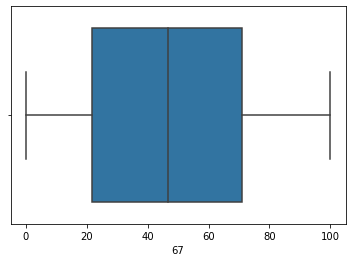

In [189]:
sns.boxplot(df2[67])

In [190]:
df4copy= df2[67].copy()
df4copy= df4copy.fillna(df4copy.mean())
df2[67]=df4copy

In [191]:
#Converting objects to numeric values
df2[66] = pd.to_numeric(df2[66],errors='coerce')

#value should be between 1 and 100. Therefore values less than or equal to 1 should be multiplied by 100.
df2[66]= df2[66].where(df2[66]>=1,df2[66]*100)

In [192]:
#merge column 66 and 17
for i in df2.index:  
    if(pd.Series(df2.at[i,66]).isnull().bool()==True):
        print("66:"+ str(df2.at[i,66]))
        if(pd.Series(df2.at[i,17]).isnull().bool()==False):
            print("17:"+ str(df2.at[i,17]))
            df2.at[i,66]=df2.at[i,17]

66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan
66:nan

In [193]:
#Converting date of birth into age
years = df2[4].str[6:]
df2[4].where(years.str.isdigit(),inplace=True)
years = df2[4].str[6:]
years.dropna(inplace=True)
df1 = df1.astype(float)
years = years.astype(float)
df2[4]= df1.subtract(years)


#filling missing values with median and replace 0 with median because 0 is wrong.
median_age=df2[4].median()
df2[4].replace(np.nan,median_age,inplace=True)
df2[4].where(df2[4]>0,median_age,inplace=True)
df2[4].replace(0,median_age,inplace=True)




In [194]:
#Converting first time appereance into years
yearsf = df2[9].str[6:]
df2[9].where(yearsf.str.isdigit(),inplace=True)
yearsf = df2[9].str[6:]
yearsf.dropna(inplace=True)
df1 = df1.astype(float)
yearsf = yearsf.astype(float)
df2[9]= df1.subtract(yearsf)


#filling missing values with median()
df2[9].replace(np.nan,df2[9].median(),inplace=True)

#In my opinion, it makes no sense to look at this feature further since observations do not make sense.
df2.drop(9, axis = 1,inplace=True)

In [195]:
#replace NaN Values with most frequent Category in several columns.
df2[5]= df2[5].fillna(df2[5].mode()[0])
df2[6]= df2[6].fillna(df2[6].mode()[0])
df2[10]= df2[10].fillna(df2[10].mode()[0])
df2[13] = df2[13].fillna(df2[13].mode()[0])
df2[35] = df2[35].fillna(df2[35].mode()[0])
df2[37] = df2[37].fillna(df2[37].mode()[0])
df2[40] = df2[40].fillna(df2[40].mode()[0])
df2[65] = df2[65].fillna(df2[65].mode()[0])
df2[68] = df2[68].fillna(df2[68].mode()[0])
df2[69] = df2[69].fillna(df2[69].mode()[0])
df2[70] = df2[70].fillna(df2[70].mode()[0])
df2[71] =  df2[71].fillna(df2[71].mode()[0])
df2[72] = df2[72].fillna(df2[72].mode()[0])
df2[73] = df2[73].fillna(df2[73].mode()[0])
df2[74] = df2[74].fillna(df2[74].mode()[0])
df2[76] = df2[76].fillna(df2[76].mode()[0])
df2[77] = df2[77].fillna(df2[77].mode()[0])
df2[78] = df2[78].fillna(df2[78].mode()[0])
df2[79] = df2[79].fillna(df2[79].mode()[0])
df2[80] = df2[80].fillna(df2[80].mode()[0])
df2[81] = df2[81].fillna(df2[81].mode()[0])
df2[82] = df2[82].fillna(df2[82].mode()[0])
df2[83] = df2[83].fillna(df2[83].mode()[0])
df2[84] = df2[84].fillna(df2[84].mode()[0])
df2[85] = df2[85].fillna(df2[85].mode()[0])

#replace NaN Values with adjacent values in Column 11 because values are close to each other.
df2[11] = df2[11].fillna(method='ffill')

#Manual processing of the Column 8
df2[8].replace('Eltern|Geschwister','No',inplace=True)
df2[8].replace('Eltern|Geschwister|Kinder','No',inplace=True)
df2[8].replace('children|siblings|parents','No',inplace=True)
df2[8].replace('children|siblings|parents','No',inplace=True)
df2[8].replace('siblings|parents','parents|siblings',inplace=True)
df2[8].replace('siblings|children','No',inplace=True)
df2[8].replace('parents|siblings|children','parents|siblings',inplace=True)
df2[8].replace('Eltern|Eltern','parents',inplace=True)
df2[8].replace('Eltern|Kinder','parents',inplace=True)
df2[8].replace('Geschwister|Kinder','siblings',inplace=True)


#replace NaN Values with No so that column 7 can be discarded. 
df2[8].replace(np.nan,'No',inplace=True)

#Manual processing of the Column 76
df2[76].replace('Ich weiß es nicht','NO',inplace=True)


38: Describe the LOUDNESS of your tinnitus 36: How does your tinnitus manifest itself over time

In [197]:
# convert column 38 'Describe the LOUDNESS of your tinnitus' to float
df2.loc[:, 38] = df2.loc[:, 38].astype('float')

# group loudness into 5 categories
# [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]
loudness = pd.cut(df2.loc[:, 38], bins=[0, 20, 40, 60, 80, 100])

In [198]:
pd.crosstab(df2.loc[:, 36], loudness)

38,"(0, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
36,,,,,
constant,710,268,379,386,214
intermittent,248,152,141,98,32


In [199]:
df2.drop(17, axis = 1,inplace=True)

# df3 only contains target values which were not imputed.
df3=df2.dropna()

#missing values in columns (in %)
df3.isna().sum()/len(df3)*100

question_id
4     0.0
5     0.0
6     0.0
8     0.0
10    0.0
11    0.0
13    0.0
35    0.0
36    0.0
37    0.0
38    0.0
40    0.0
65    0.0
66    0.0
67    0.0
68    0.0
69    0.0
70    0.0
71    0.0
72    0.0
73    0.0
74    0.0
76    0.0
77    0.0
78    0.0
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
dtype: float64

In [200]:
df3[38] = df3[38].astype('float')
df3[38] = df3[38].replace(0.0,1)

#Dividing feature 38 into categories
df3['38b'] = pd.cut(df3[38], bins=[0, 20, 40, 60, 80, 100])

df3['38b'].replace('NaN','(0, 20]',inplace=True)

<ipython-input-200-fdf9eccd69d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[38] = df3[38].astype('float')
<ipython-input-200-fdf9eccd69d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[38] = df3[38].replace(0.0,1)
<ipython-input-200-fdf9eccd69d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [201]:

df3['38b']= df3['38b'].astype(str)
df3[36] = df3[36].astype(str)

# Combining feature 36 and 38 to target column
df3['target']= df3['38b'] + df3[36]
df3.isna().sum()/len(df3)*100

#Encoding target strings into integer values
df3['target'].replace('(0, 20]constant',0,inplace=True)
df3['target'].replace('(20, 40]constant',1,inplace=True)
df3['target'].replace('(40, 60]constant',2,inplace=True)
df3['target'].replace('(60, 80]constant',3,inplace=True)
df3['target'].replace('(80, 100]constant',4,inplace=True)
df3['target'].replace('(0, 20]intermittent',5,inplace=True)
df3['target'].replace('(20, 40]intermittent',6,inplace=True)
df3['target'].replace('(40, 60]intermittent',7,inplace=True)
df3['target'].replace('(60, 80]intermittent',8,inplace=True)
df3['target'].replace('(80, 100]intermittent',9,inplace=True)
df3.drop([38,'38b',36], axis = 1,inplace=True)


<ipython-input-201-a733c5ee4d44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['38b']= df3['38b'].astype(str)
<ipython-input-201-a733c5ee4d44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[36] = df3[36].astype(str)
<ipython-input-201-a733c5ee4d44>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [202]:
#Write Dataframe into CSV
df3.to_csv(root+"data/02_processed/PreprocessedData.csv",sep=';')

In [203]:
df3

question_id,4,5,6,8,10,11,13,35,37,40,...,77,78,79,80,81,82,83,84,85,target
user_id,,,,,,,,,,,,,,,,,,,,,
64,36.0,Male,Right,No,Gradual,stress,NO,"both ears, equally",Yes,noise,...,Left,Sometimes,NO,NO,YES,NO,NO,NO,YES,5
77,36.0,Male,Right,No,Gradual,stress,YES with heart beat,right ear,No,crickets,...,None,Sometimes,NO,NO,NO,NO,NO,NO,NO,7
125,45.0,Male,Right,No,Abrupt,other,NO,"both ears, worse in right",Yes,crickets,...,None,Sometimes,NO,NO,NO,NO,NO,NO,NO,3
184,36.0,Male,Right,parents,Gradual,stress,YES with heart beat,right ear,Yes,tone,...,None,Rarely,I don’t know,YES,NO,NO,YES,NO,NO,8
188,48.0,Female,Right,parents|siblings,Gradual,stress,"YES, different from heart beat",inside the head,Yes,tone,...,None,Rarely,NO,NO,NO,NO,NO,NO,YES,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,70.0,Female,Left,parents|siblings,Gradual,loud blast of sound,YES with heart beat,"both ears, worse in left",Yes,tone,...,Both,Usually,I don’t know,NO,NO,NO,NO,NO,NO,7
6403,49.0,Female,Right,No,Abrupt,other,NO,"both ears, worse in right",Yes,crickets,...,None,Always,YES,YES,YES,NO,NO,NO,YES,8
6404,36.0,Male,Both Sides,parents,Gradual,loud blast of sound,YES with heart beat,elsewhere,Yes,crickets,...,None,Always,YES,YES,NO,NO,NO,YES,NO,1


In [204]:
print("reached")

reached
